In [1]:
from dataframe_utils import *
from plotting_utils import *

In [2]:
df_em = pd.read_csv(f'../summary_data/em_summary.csv')
df_ent_lay = pd.read_csv(f'../summary_data/ent_lay_summary.csv')
df_ent_deep = pd.read_csv(f'../summary_data/ent_deep_summary.csv')


In [3]:
print(df_ent_lay)

   control  momectomy 5 dpf  mom ectomy 7 dpf   mom ectomy_ freshwater  \
0     9.32             6.38               7.51                    7.70   
1     8.57             5.61               7.71                    8.47   
2     9.32              NaN               7.38                    7.79   
3     9.35              NaN                NaN                     NaN   
4     8.41              NaN                NaN                     NaN   

   feeding  CS +2dpf  CS -2dpf  
0     8.40      8.64      7.71  
1     7.74      9.33      8.49  
2     7.79      9.46       NaN  
3      NaN       NaN       NaN  
4      NaN       NaN       NaN  


In [4]:
em_mean_values = df_em.mean()
ent_lay_mean_values = df_ent_lay.mean()
ent_deep_mean_values = df_ent_deep.mean()

In [5]:
# Reverse the order of mean values
em_mean_values = em_mean_values[::-1]
ent_lay_mean_values = ent_lay_mean_values[::-1]
ent_deep_mean_values = ent_deep_mean_values[::-1]
print(em_mean_values)
print(ent_lay_mean_values)
print(ent_deep_mean_values)

CS -2dpf                   9.505000
CS +2dpf                  10.670000
feeding                    9.355000
mom ectomy_ freshwater     9.386667
mom ectomy 7 dpf           8.010000
momectomy 5 dpf            6.270000
control                    9.654000
dtype: float64
CS -2dpf                  8.100000
CS +2dpf                  9.143333
feeding                   7.976667
mom ectomy_ freshwater    7.986667
mom ectomy 7 dpf          7.533333
momectomy 5 dpf           5.995000
control                   8.994000
dtype: float64
CS -2dpf                  3.260000
CS +2dpf                  3.186667
feeding                   3.066667
mom ectomy_ freshwater    3.260000
mom ectomy 7 dpf          3.403333
momectomy 5 dpf           3.470000
control                   3.280000
dtype: float64


In [6]:
contol_line=df_em['control'].mean()

### Plotting

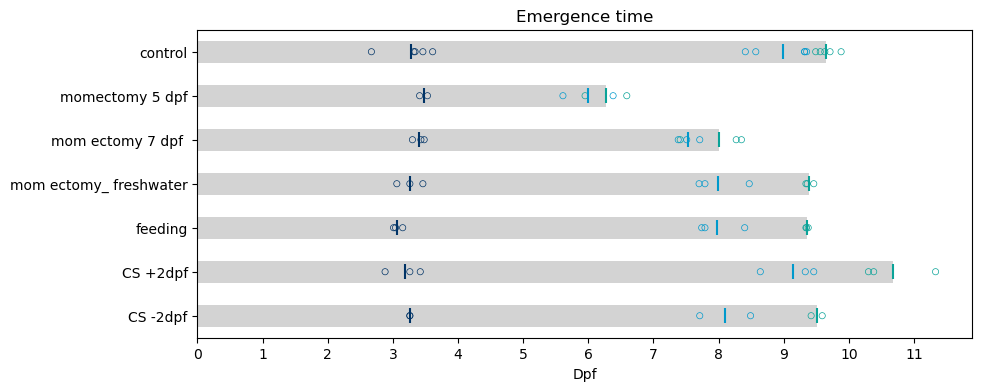

In [7]:
# Sample data for 'emergence' and 'ent_lay'
# emergence_data = df_em
# ent_lay_data = df_ent_lay

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Set the width of the bars
bar_height = 0.35
bar_positions = np.arange(7)

# Plot 'emergence' mean as a bar graph
em_mean_values.plot(kind='barh', ax=ax, label='Mean', color= '#d3d3d3')
# Plot 'emergence' mean and scatter points in a different color
ax.vlines(em_mean_values, bar_positions - bar_height/2, bar_positions + bar_height/2, color='#0aa398', label='ent_lay mean')

for col in df_em.columns[::-1]:
    ax.scatter(df_em[col], [col] * len(df_em), label=col,marker='o', facecolors='none',linewidth=0.5, s=20, edgecolors='#0aa398', zorder=2)

# Plot 'ent_lay' mean and scatter points in a different color
ax.vlines(ent_lay_mean_values, bar_positions - bar_height/2, bar_positions + bar_height/2, color='#0099cc', label='ent_lay mean')


for col in df_ent_lay.columns[::-1]:
    ax.scatter(df_ent_lay[col], [col] * len(df_ent_lay), label=col,marker='o', facecolors='none',linewidth=0.5, s=20, edgecolors='#0099cc', zorder=2)

# Plot 'ent_deep' mean and scatter points in a different color
ax.vlines(ent_deep_mean_values, bar_positions - bar_height/2, bar_positions + bar_height/2, color='#003366', label='ent_lay mean')


for col in df_ent_deep.columns[::-1]:
    ax.scatter(df_ent_deep[col], [col] * len(df_ent_deep), label=col,marker='o', facecolors='none',linewidth=0.5, s=20, edgecolors='#003366', zorder=2)


#adding labels
ax.set_xlabel('Dpf')
ax.set_title('Emergence time')
ax.set_xticks(np.arange(0,12))
ax.set_yticklabels(df_em.columns[::-1])


# Show the plot
plt.show()


In [8]:
# get current timestamp, which is used as part of the saved figure's file name (to avoid overwriting the same file)
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
save_path = f'../summary_plots/Key_timepoints_summary_{timestamp_now}.pdf'

# save figure (either as png or pdf)
fig.savefig(save_path, bbox_inches='tight')
print('Figure saved to:', os.path.abspath(save_path))

Figure saved to: p:\Anaysis\Inshell\summary_plots\Key_timepoints_summary_20240808_172316.pdf
